# 5.最长回文子串

1.这道题写的好折磨（菜是原罪），主要问题出现在索引和条件判断不清晰，导致测试的时候总有例子出错。

2.算法的时间复杂度和空间复杂度可优化的空间也非常大，之后有时间最好能再回顾一下这道题（第一次做的有点遗憾。

3.下次知道能在力扣里面的代码上再自己加def了ouo

## 5.1题目描述

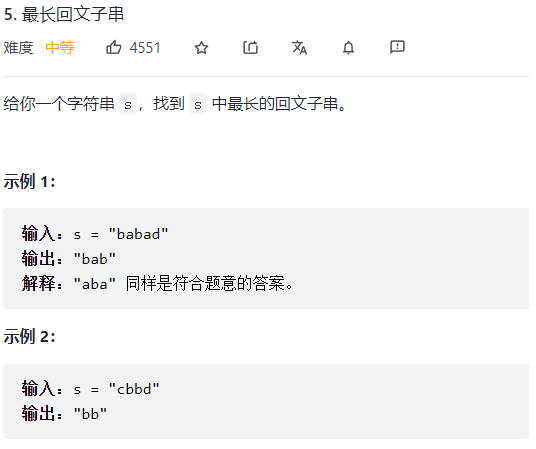

## 5.2对比结果

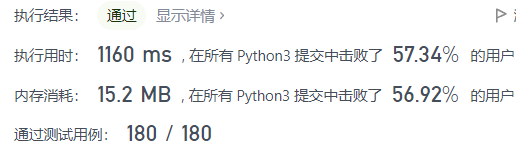

## 5.3我的代码

In [49]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        s_list = list(s)
        s_list.append(0)
        count = 0
        temp = s_list[0]
        m = len(s_list)
        # i 为指针 
        # 判断i和i-1是否相同
        # 判断i-1和i+1是否相同
        i = 1
        while i>0 and i<len(s_list):
            j = 1
            if s_list[-1] == s_list[-2]:
                count = 2
                temp = s_list[-2,-1]
            while i-j>=0 and i+j<len(s_list):
                if s_list[i-j] == s_list[i+j-1]:
                    if 2*j > count:
                        count = 2*j
                        temp = s_list[i-j:i+j-1+1]
                else:
                    break
                j = j + 1
            j = 1
            while i-j>=0 and i+j<len(s_list):
                if s_list[i-j] == s_list[i+j]:
                    if  2*j+1 > count:
                         count = 2*j+1
                         temp = s_list[i-j:i+j+1]
                else:
                    break
                j = j + 1
            i = i + 1
        temp2 = "".join(temp)
        return temp2

## 5.4官方代码

### 5.4.1动态规划

In [50]:
class Solution:
    def longestPalindrome(self, s: str) -> str:
        n = len(s)
        if n < 2:
            return s
        
        max_len = 1
        begin = 0
        # dp[i][j] 表示 s[i..j] 是否是回文串
        dp = [[False] * n for _ in range(n)]
        for i in range(n):
            dp[i][i] = True
        
        # 递推开始
        # 先枚举子串长度
        for L in range(2, n + 1):
            # 枚举左边界，左边界的上限设置可以宽松一些
            for i in range(n):
                # 由 L 和 i 可以确定右边界，即 j - i + 1 = L 得
                j = L + i - 1
                # 如果右边界越界，就可以退出当前循环
                if j >= n:
                    break
                    
                if s[i] != s[j]:
                    dp[i][j] = False 
                else:
                    if j - i < 3:
                        dp[i][j] = True
                    else:
                        dp[i][j] = dp[i + 1][j - 1]
                
                # 只要 dp[i][L] == true 成立，就表示子串 s[i..L] 是回文，此时记录回文长度和起始位置
                if dp[i][j] and j - i + 1 > max_len:
                    max_len = j - i + 1
                    begin = i
        return s[begin:begin + max_len]

# 作者：LeetCode-Solution
# 链接：https://leetcode-cn.com/problems/longest-palindromic-substring/solution/zui-chang-hui-wen-zi-chuan-by-leetcode-solution/
# 来源：力扣（LeetCode）
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

### 5.4.2中心扩展

In [51]:
class Solution:
    def expandAroundCenter(self, s, left, right):
        while left >= 0 and right < len(s) and s[left] == s[right]:
            left -= 1
            right += 1
        return left + 1, right - 1

    def longestPalindrome(self, s: str) -> str:
        start, end = 0, 0
        for i in range(len(s)):
            left1, right1 = self.expandAroundCenter(s, i, i)
            left2, right2 = self.expandAroundCenter(s, i, i + 1)
            if right1 - left1 > end - start:
                start, end = left1, right1
            if right2 - left2 > end - start:
                start, end = left2, right2
        return s[start: end + 1]

# 作者：LeetCode-Solution
# 链接：https://leetcode-cn.com/problems/longest-palindromic-substring/solution/zui-chang-hui-wen-zi-chuan-by-leetcode-solution/
# 来源：力扣（LeetCode）
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

## 5.4.3Manacher 算法

In [52]:
class Solution:
    def expand(self, s, left, right):
        while left >= 0 and right < len(s) and s[left] == s[right]:
            left -= 1
            right += 1
        return (right - left - 2) // 2

    def longestPalindrome(self, s: str) -> str:
        end, start = -1, 0
        s = '#' + '#'.join(list(s)) + '#'
        arm_len = []
        right = -1
        j = -1
        for i in range(len(s)):
            if right >= i:
                i_sym = 2 * j - i
                min_arm_len = min(arm_len[i_sym], right - i)
                cur_arm_len = self.expand(s, i - min_arm_len, i + min_arm_len)
            else:
                cur_arm_len = self.expand(s, i, i)
            arm_len.append(cur_arm_len)
            if i + cur_arm_len > right:
                j = i
                right = i + cur_arm_len
            if 2 * cur_arm_len + 1 > end - start:
                start = i - cur_arm_len
                end = i + cur_arm_len
        return s[start+1:end+1:2]

# 作者：LeetCode-Solution
# 链接：https://leetcode-cn.com/problems/longest-palindromic-substring/solution/zui-chang-hui-wen-zi-chuan-by-leetcode-solution/
# 来源：力扣（LeetCode）
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

## 5.5回顾

1.我的这个方法看上去更像是中心扩展，但是没有官网方法这么简洁，被子串长度的奇偶性和边界条件限制住了，如果能够从状态方程考虑这个问题会更好。